## Illustration of some classical unsupervised algorithms

Some of the algorithms are:

* k-Means
* Principle Component Analysis
* Independent Component Analysis
* Apriori algorithm


### k-Means

k-Means is a simple algorithm that aims at finding clusters in a dataset. It is a centroid-based algorithm, which works iteratively to assign each data point to one of k groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the k-Means clustering algorithm are:

* The centroids of the k clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)


The datset used can be found [here](https://www.kaggle.com/datasets/shwetabh123/mall-customers).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the data
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Drop the CustomerID column
df.drop('CustomerID', axis=1, inplace=True)

In [3]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
# encode columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit and transform 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

In [5]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
# RUN EITHER THIS CELL OR THE NEXT ONE, NOT BOTH
# perform scaling
scaler = StandardScaler()   
scaled_df = scaler.fit_transform(df)

# Create 10 clusters (any number more than 3 is fine)
kmeans = KMeans(n_clusters=10)

# Fit the model
kmeans.fit(scaled_df)

# Get the cluster centroids
print(kmeans.cluster_centers_)

[[ 1.12815215 -0.39989994  1.01344075  1.26040667 -0.19167109]
 [-0.88640526  1.06068509 -0.23342726 -0.06096423  1.31163158]
 [-0.88640526  0.35421988  1.24912183 -1.14745442 -1.69497376]
 [-0.88640526 -0.82859324 -0.0960542  -0.13098057  0.62534123]
 [ 1.12815215  1.33075947 -0.48486081 -0.42786906 -0.94332243]
 [-0.88640526 -0.93245435 -1.29459798  1.12360689  0.55998025]
 [ 1.12815215 -1.02205127 -0.75821082  0.43783969 -0.22435158]
 [ 1.12815215 -0.02700694  0.96701244 -1.39716754 -1.45761018]
 [-0.88640526  0.19294198 -1.2985827  -1.14553467  1.31163158]
 [-0.88640526 -0.47793198  0.97284787  1.22158511  0.55998025]]


In [50]:
# In this cell, the clusters haven't been scaled, so the centroids are in the original units
# As a result, the centroids are not very interpretable and are very skewed from each other
# Create 10 clusters (any number more than 3 is fine)
kmeans = KMeans(n_clusters=10)

# other arguments can be given here
# kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
# n_clusters is the number of clusters we want to create
# max_iter is the maximum number of iterations there can be to find the final clusters when the K-means algorithm is running.
# algorithm is the type of algorithm to be used for the initialisation. The default is 'auto' which decides the most appropriate algorithm to use. The other options are 'full' and 'elkan'. 
# The 'full' algorithm runs the standard EM-style algorithm. The 'elkan' algorithm is more efficient on data with well-defined clusters, by using the triangle inequality.

# Fit the model
kmeans.fit(df)

# Get the cluster centroids
print(kmeans.cluster_centers_)

[[  0.41666667  48.75        24.58333333   9.58333333   4.25      ]
 [  0.45454545  32.45454545 108.18181818  82.72727273   4.27272727]
 [  0.34482759  46.55172414  56.37931034  47.48275862   7.17241379]
 [  0.40909091  25.27272727  25.72727273  79.36363636   3.36363636]
 [  0.64        41.16        79.6         15.16         3.        ]
 [  0.46428571  32.78571429  78.03571429  81.89285714   4.32142857]
 [  0.37931034  24.44827586  56.37931034  50.72413793   5.96551724]
 [  0.3         41.         109.7         22.           1.2       ]
 [  0.33333333  37.5         29.33333333  34.58333333   4.16666667]
 [  0.54545455  63.90909091  53.04545455  50.63636364   6.90909091]]


In [16]:
centroids = kmeans.cluster_centers_

In [17]:
centroids[3]

array([-0.88640526, -0.82859324, -0.0960542 , -0.13098057,  0.62534123])

In [18]:
# Get the labels
print(kmeans.labels_)

# we have 4 unique labels (0, 1, 2, 3), matching the 4 clusters we created [This applies to a 4 cluster example]
# we have 10 unique labels (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), matching the 10 clusters we created [This applies to a 10 cluster example]

[6 6 8 5 8 5 8 5 4 5 4 5 8 5 4 6 8 6 4 5 6 6 8 6 8 6 8 6 8 5 4 5 4 6 8 5 8
 5 8 5 1 6 4 5 8 5 1 3 3 3 1 6 3 4 1 4 1 4 3 4 4 6 1 1 4 6 1 1 6 3 4 1 1 1
 4 6 1 4 3 1 4 6 4 1 3 4 1 3 3 1 1 6 4 1 3 6 1 3 4 6 3 1 4 6 4 3 1 4 4 4 4
 3 3 6 3 3 1 1 1 1 6 3 3 0 3 9 7 0 4 0 7 0 3 9 7 9 2 0 7 9 2 0 3 9 7 0 7 9
 2 0 7 0 2 9 2 9 7 9 7 9 1 9 7 9 7 9 7 9 2 0 7 0 7 0 2 9 7 0 7 0 2 9 7 9 2
 0 2 0 2 9 2 9 7 9 2 9 2 0 7 0]


In [19]:
# Add the labels to the dataframe
df['labels'] = kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,19,15,39,6
1,1,21,15,81,6
2,0,20,16,6,8
3,0,23,16,77,5
4,0,31,17,40,8


In [20]:
# Now we show the frequency of each label
df['labels'].value_counts()

4    28
1    27
6    23
3    23
9    21
7    19
0    18
5    14
2    14
8    13
Name: labels, dtype: int64

In [21]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

Additional

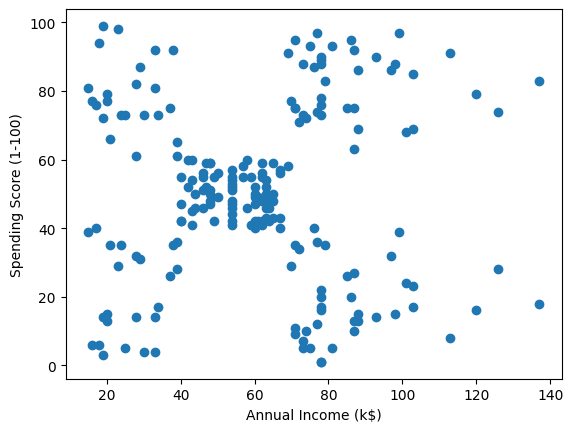

In [22]:
# Plot original data
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

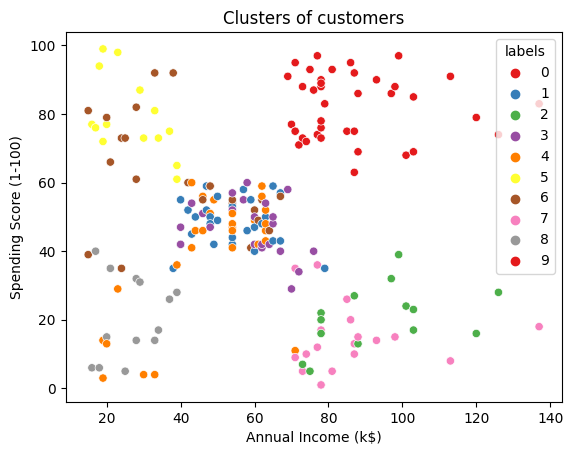

In [23]:

# Plot the clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='labels', palette='Set1')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()